# Time Series Exercise - Solutions



** Import numpy pandas and matplotlib **

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

** Use pandas to read the csv of the monthly-milk-production.csv file and set index_col='Month' **

In [ ]:
milk = pd.read_csv('monthly-milk-production.csv',
                   index_col='Month')

** Check out the head of the dataframe**

In [ ]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [ ]:
milk.index = pd.to_datetime(milk.index)

** Plot out the time series data. **

<AxesSubplot:xlabel='Month'>

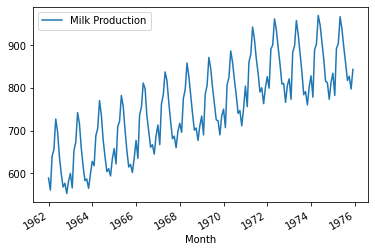

In [ ]:
milk.plot()

___

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 3 months of data is the test set, with everything before it is the training. **

In [ ]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [ ]:
train_set = milk.head(168-num_time_steps)

In [ ]:
test_set = milk.tail(num_time_steps)

### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_scaled = scaler.fit_transform(train_set)

In [ ]:
test_scaled = scaler.transform(test_set)

## Batch Function

** We'll need a function that can feed batches of the training data. We'll need to do several things that are listed out as steps in the comments of the function. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [ ]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """

    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps

    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps. Then reshape this data to be (1,steps)

    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN. Depending on your indexing it
    # will be either .reshape(-1,steps-1,1) or .reshape(-1,steps,1)

In [ ]:
def next_batch(training_data,batch_size,steps):


    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps)

    # Create Y data for time series in the batches
    y_batch = np.array(
        training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(
        -1, steps, 1), y_batch[:, 1:].reshape(
        -1, steps, 1)

## Setting Up The RNN Model

** Import TensorFlow **

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### The Constants

** Define the constants in a single cell. You'll need the following (in parenthesis are the values I used in my solution, but you can play with some of these): **
* Number of Inputs (1)
* Number of Time Steps (30)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.03)
* Number of Iterations for Training (5000)
* Batch Size (20)

In [ ]:
# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 30
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.03
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 5000
# Size of the batch of data
batch_size = 20

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.**  

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [ ]:
# RNN

In [ ]:
#LSTM

C:\Users\Farid\anaconda3-NEW\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:901: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "


** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [ ]:
# outputs, states =

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Farid\anaconda3-NEW\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [ ]:
# loss =  # MSE
# optimizer
# train = optimizer.minimize(loss)

** Initialize the global variables **

In [ ]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() **

In [ ]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. **

In [ ]:
with tf.Session as sess:
    sess.run(init)

    for iteration in range(num_train_iterations):

        pass

0 	MSE: 0.09389772
100 	MSE: 0.085011035
200 	MSE: 0.15364257
300 	MSE: 0.27087426
400 	MSE: 0.12796336
500 	MSE: 0.123085745
600 	MSE: 0.23848757
700 	MSE: 0.16343766
800 	MSE: 0.10579586
900 	MSE: 0.0974456
1000 	MSE: 0.08708251
1100 	MSE: 0.097063825
1200 	MSE: 0.15371497
1300 	MSE: 0.11512084
1400 	MSE: 0.14913619
1500 	MSE: 0.100579835
1600 	MSE: 0.11527793
1700 	MSE: 0.22655231
1800 	MSE: 0.16229045
1900 	MSE: 0.10832037
2000 	MSE: 0.16718899
2100 	MSE: 0.10449525
2200 	MSE: 0.12005256
2300 	MSE: 0.17467147
2400 	MSE: 0.10417198
2500 	MSE: 0.1487207
2600 	MSE: 0.10996258
2700 	MSE: 0.1574358
2800 	MSE: 0.31740797
2900 	MSE: 0.22412854
3000 	MSE: 0.10918573
3100 	MSE: 0.13921107
3200 	MSE: 0.306899
3300 	MSE: 0.29146802
3400 	MSE: 0.12540157
3500 	MSE: 0.1152809
3600 	MSE: 0.11260482
3700 	MSE: 0.09771
3800 	MSE: 0.27687025
3900 	MSE: 0.118315026
4000 	MSE: 0.18295799
4100 	MSE: 0.10633994
4200 	MSE: 0.11222101
4300 	MSE: 0.3182539
4400 	MSE: 0.12142253
4500 	MSE: 0.2738735
4600 	

______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [ ]:
test_set

,Milk Production
Month,
1973-07-01 01:00:00,881.0
1973-08-01 01:00:00,837.0
1973-09-01 01:00:00,784.0
1973-10-01 01:00:00,791.0
1973-11-01 01:00:00,760.0
1973-12-01 01:00:00,802.0
1974-01-01 01:00:00,828.0
1974-02-01 01:00:00,778.0
1974-03-01 01:00:00,889.0


In [ ]:
with tf.Session() as sess:

    # Use your Saver instance to restore your saved rnn time series model
    # saver.restore(sess, "")



INFO:tensorflow:Restoring parameters from ./ex_time_series_model


<ipython-input-59-cb9ca89c2f6d>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)


In [ ]:
y_pred[0, 0, 0]

0.6314576

** Show the result of the predictions. **

In [ ]:
train_seed

[array([0.81971154]),
 array([0.72596154]),
 array([0.61538462]),
 array([0.61778846]),
 array([0.51201923]),
 array([0.60576923]),
 array([0.64423077]),
 array([0.52884615]),
 array([0.79326923]),
 array([0.82932692]),
 array([0.97115385]),
 array([0.89182692]),
 array([0.78846154]),
 array([0.68269231]),
 array([0.55528846]),
 array([0.57211538]),
 array([0.49759615]),
 array([0.59855769]),
 array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.7615935,
 0.7615939,
 0.7615939,
 0.7615939,
 0.7615937,
 0.7615938,
 0.7615939,
 0.7615938,
 0.7615936,
 0.76159346,
 0.7615932,
 0.7615932,
 0.76159364,
 0.7615939,
 0.7615938,
 0.7615938,
 0.7615937,
 0.7615939,
 0.7615939,
 0.76159376,
 0.7615935,
 0.7615934,
 0.76159316,
 0.7615933,
 0.76159334,
 0.7615938,
 0.7615939,
 0.7615939,
 0.7615937,


** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [ ]:
# results = scaler.inverse_transform


** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [ ]:
test_set['Generated'] = results

<ipython-input-64-27957d04ddb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Generated'] = results


** View the test_set dataframe. **

In [ ]:
test_set

,Milk Production,Generated
Month,,
1973-07-01 01:00:00,881.0,830.877197
1973-08-01 01:00:00,837.0,824.845581
1973-09-01 01:00:00,784.0,814.674744
1973-10-01 01:00:00,791.0,814.929749
1973-11-01 01:00:00,760.0,802.513184
1973-12-01 01:00:00,802.0,813.641357
1974-01-01 01:00:00,828.0,817.641479
1974-02-01 01:00:00,778.0,804.650024
1974-03-01 01:00:00,889.0,829.400085


** Plot out the two columns for comparison. **

<AxesSubplot:xlabel='Month'>

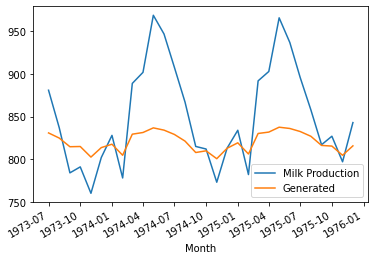

In [ ]:
test_set.plot()